Gini for Loan Housing

              precision    recall  f1-score   support

           N       0.38      0.30      0.34        43
           Y       0.66      0.74      0.70        80

    accuracy                           0.59       123
   macro avg       0.52      0.52      0.52       123
weighted avg       0.56      0.59      0.57       123



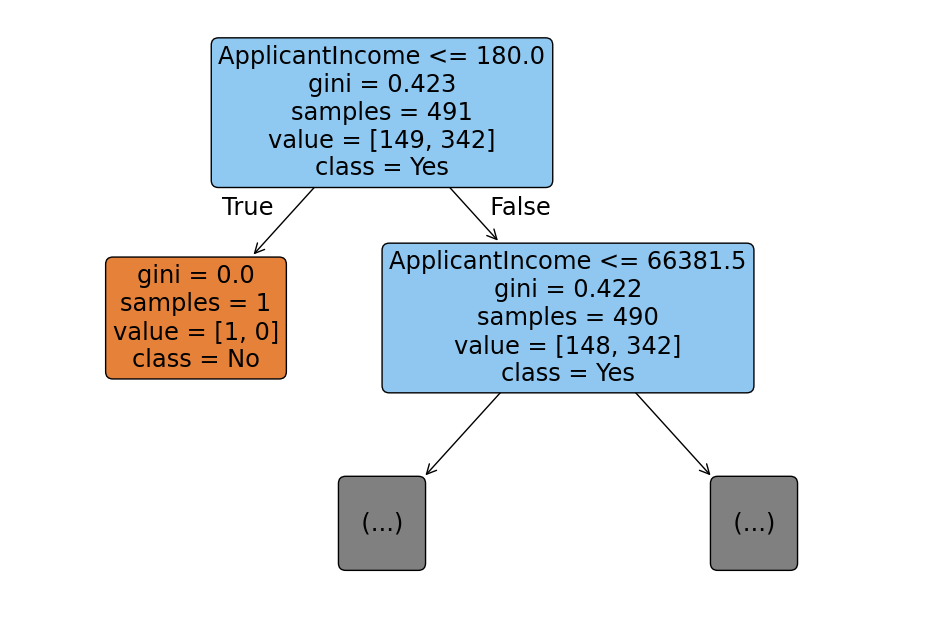

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

df= pd.read_csv('loan_sanction_train.csv')

X = df[['ApplicantIncome']]
y = df[['Loan_Status']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = DecisionTreeClassifier(criterion='gini', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=['ApplicantIncome'], class_names=['No', 'Yes'], rounded=True,max_depth=1)
plt.show()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def gini_index(label):
  prob = label.value_counts(normalize = True)
  return 1-np.sum(prob**2)

def info_gain(df,feature,target):
  gini_before = gini_index(df[target])
  subsets = [df[df[feature]==value][target] for value in df[feature].unique()]
  weighted = sum((len(subset)/len(df))*gini_index(subset) for subset in subsets)
  return gini_before - weighted


features = ['ApplicantIncome']
target = 'Loan_Status'

df= pd.read_csv('loan_sanction_train.csv')

print(f'Initial Gini Index:{gini_index(df[target])}')
for feature in features:
  print(f'Information Gain for {feature}:{info_gain(df,feature,target)}')
  for value in df[feature].unique():
    subset = df[df[feature]==value][target]
    print(f'Gini Index for {value}:{gini_index(subset)}')

Initial Gini Index:0.42984010440429077
Information Gain for ApplicantIncome:0.35658639466849634
Gini Index for 5849:0.0
Gini Index for 4583:0.4444444444444444
Gini Index for 3000:0.4444444444444444
Gini Index for 2583:0.0
Gini Index for 6000:0.4444444444444444
Gini Index for 5417:0.4444444444444444
Gini Index for 2333:0.4444444444444444
Gini Index for 3036:0.0
Gini Index for 4006:0.0
Gini Index for 12841:0.0
Gini Index for 3200:0.5
Gini Index for 2500:0.19753086419753085
Gini Index for 3073:0.0
Gini Index for 1853:0.0
Gini Index for 1299:0.0
Gini Index for 4950:0.0
Gini Index for 3596:0.0
Gini Index for 3510:0.5
Gini Index for 4887:0.0
Gini Index for 2600:0.5
Gini Index for 7660:0.0
Gini Index for 5955:0.0
Gini Index for 3365:0.0
Gini Index for 3717:0.5
Gini Index for 9560:0.0
Gini Index for 2799:0.0
Gini Index for 4226:0.0
Gini Index for 1442:0.0
Gini Index for 3750:0.48
Gini Index for 4166:0.48
Gini Index for 3167:0.4444444444444444
Gini Index for 4692:0.0
Gini Index for 3500:0.0
Gin